<a href="https://colab.research.google.com/github/narc01eptic/vmsk-2021/blob/main/vmsk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install neurokit2
!pip install wfdb

In [2]:
import neurokit2 as nk
import wfdb
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# ecg = []
# with open('/content/sample_data/Signals01.txt') as f:
#     lines = f.readlines() # list containing lines of file

#     for line in lines:
#         if line: ecg.append(int(line.strip().split("\t")[0]))


In [7]:
# signal, fields = wfdb.rdsamp("/content/sample_data/drive01")

In [66]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [84]:
ecg = []
with open('/content/drive/MyDrive/ecg/PX113190529165727_full_ch_1.txt') as f:
    lines = f.readlines() # list containing lines of file
    for line in lines:
        if line: ecg.append(float(line.strip()))

In [21]:
plt.rcParams['figure.figsize'] = [15, 9]  # Bigger images

signal length:  5095562500


Text(0.5, 1.0, 'ECG')

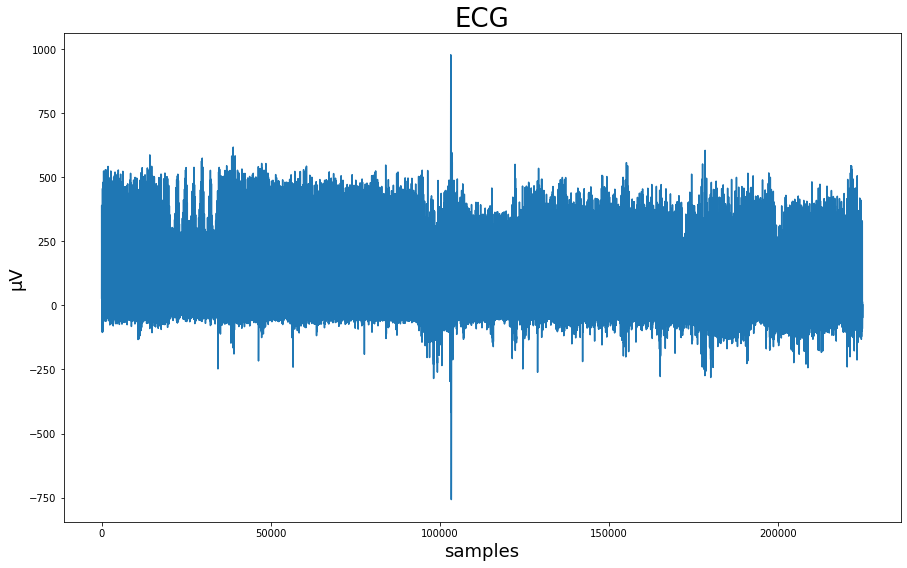

In [85]:
# fs = fields["fs"]
fs = 250
sec = 900
ecg_part = ecg[0:int(fs*sec)]
# ecg_part = signal[0:int(fs*sec),0]
print("signal length: ", len(ecg) * fs)
ecg_clean = nk.ecg_clean(ecg_part, sampling_rate=fs, method="neurokit")
# plt.ylabel(fields['units'][0], fontsize=18)
plt.ylabel("μV", fontsize=18)
plt.xlabel("samples", fontsize=18)
plt.plot(ecg_clean, color="#1f77b4")
plt.title("ECG",fontsize=26)

In [23]:
# signals, info = nk.ecg_process(ecg_clean, sampling_rate=fs);
# signals
# peaks = signals["ECG_R_Peaks"]

In [102]:
peaks, info = nk.ecg_peaks(ecg_clean, sampling_rate=fs, correct_artifacts=True)

,HRV_RMSSD,HRV_MeanNN,HRV_SDNN,HRV_SDSD,HRV_CVNN,HRV_CVSD,HRV_MedianNN,HRV_MadNN,HRV_MCVNN,HRV_IQRNN,HRV_pNN50,HRV_pNN20,HRV_TINN,HRV_HTI
0,140.559546,660.755882,126.911507,140.611273,0.19207,0.212725,638.0,97.8516,0.153372,140.0,66.764706,83.161765,984.0,8.774194


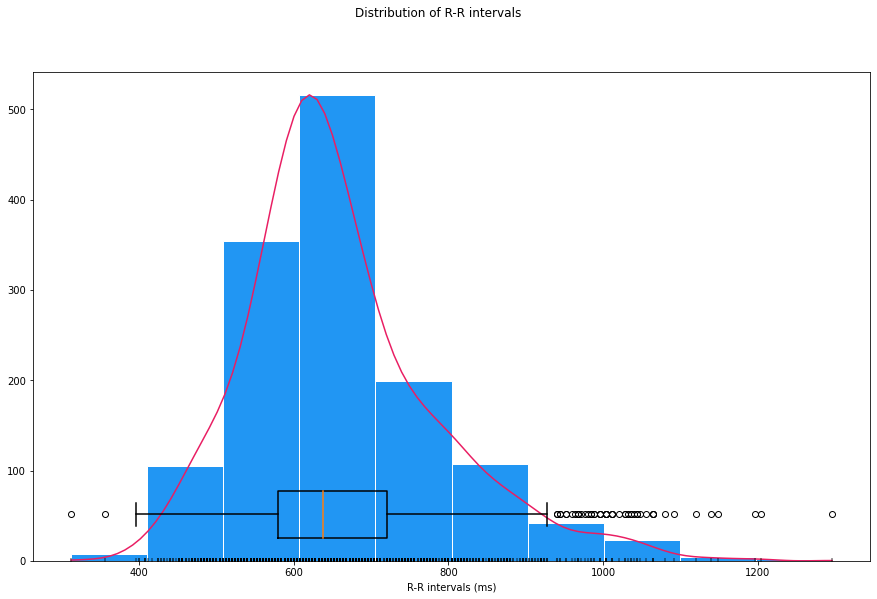

In [103]:
hrv_time = nk.hrv_time(peaks, sampling_rate=fs, show=True)
hrv_time

,HRV_ULF,HRV_VLF,HRV_LF,HRV_HF,HRV_VHF,HRV_LFHF,HRV_LFn,HRV_HFn,HRV_LnHF
0,NaN,NaN,0.015733,0.02595,0.006503,0.606298,0.326515,0.538538,-3.651583


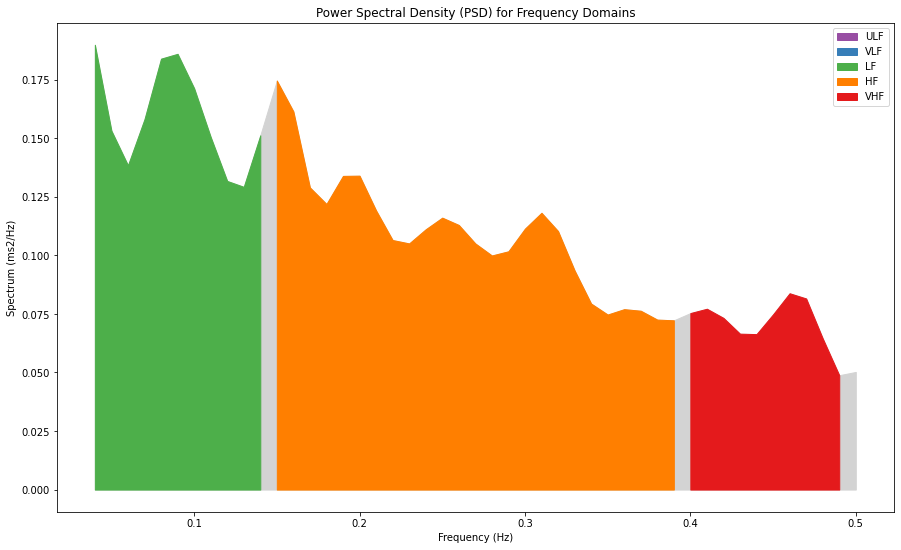

In [104]:
hrv_freq = nk.hrv_frequency(peaks, sampling_rate=fs, show=True)
hrv_freq

,HRV_SD1,HRV_SD2,HRV_SD1SD2,HRV_S,HRV_CSI,HRV_CVI,HRV_CSI_Modified,HRV_PIP,HRV_IALS,HRV_PSS,HRV_PAS,HRV_GI,HRV_SI,HRV_AI,HRV_PI,HRV_C1d,HRV_C1a,HRV_SD1d,HRV_SD1a,HRV_C2d,HRV_C2a,HRV_SD2d,HRV_SD2a,HRV_Cd,HRV_Ca,HRV_SDNNd,HRV_SDNNa,HRV_ApEn,HRV_SampEn
0,99.427184,149.361498,0.665681,46654.51458,1.50222,5.375864,897.495277,0.655882,0.645309,0.892435,0.224432,49.968051,49.922624,50.01132,50.038139,0.508422,0.491578,70.895305,69.710996,0.507798,0.492202,106.434905,104.787729,0.50799,0.49201,90.428241,88.994638,1.667327,1.878785


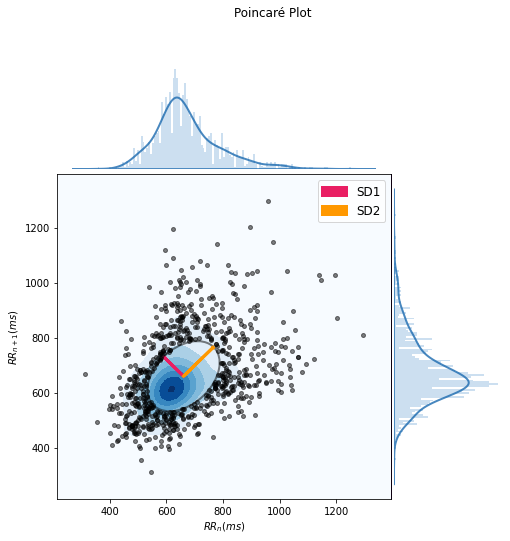

In [105]:
hrv_non = nk.hrv_nonlinear(peaks, sampling_rate=fs, show=True)
hrv_non

In [93]:
sec = 120
window_size = int(fs*sec)
LF, ecg_w = [], [[]]
w = 0
for p in ecg_clean:
  if w == window_size:
    ecg_w.append([p])
    w = 0
  else:
    ecg_w[-1].append(p)
  w += 1

In [94]:
for w in ecg_w:
  peaks, info = nk.ecg_peaks(w, sampling_rate=fs, correct_artifacts=True)
  hrv_freq = nk.hrv_frequency(peaks, sampling_rate=fs, show=False)
  LF.append(hrv_freq["HRV_LF"])


Text(0.5, 1.0, 'LF')

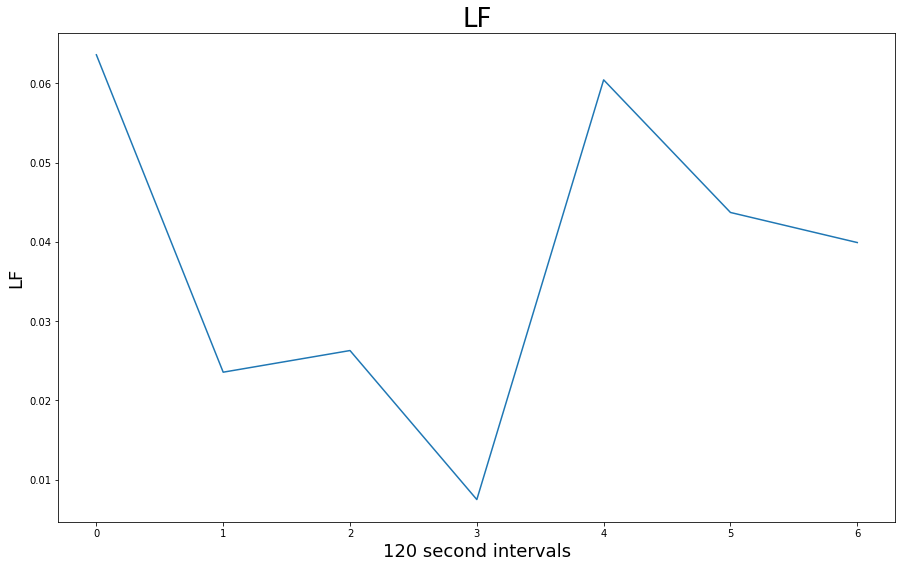

In [95]:
plt.ylabel("LF", fontsize=18)
plt.xlabel(str(sec)+" second intervals", fontsize=18)
plt.plot(LF, color="#1f77b4")
plt.title("LF",fontsize=26)

In [100]:
sec = 240
window_size = int(fs*sec)
LF, ecg_w = [], [[]]
w = 0
for p in ecg_clean:
  if w == window_size:
    ecg_w.append([p])
    w = 0
  else:
    ecg_w[-1].append(p)
  w += 1
for w in ecg_w:
  peaks, info = nk.ecg_peaks(w, sampling_rate=fs, correct_artifacts=True)
  hrv_freq = nk.hrv_frequency(peaks, sampling_rate=fs, show=False)
  LF.append(hrv_freq["HRV_LF"])

Text(0.5, 1.0, 'LF')

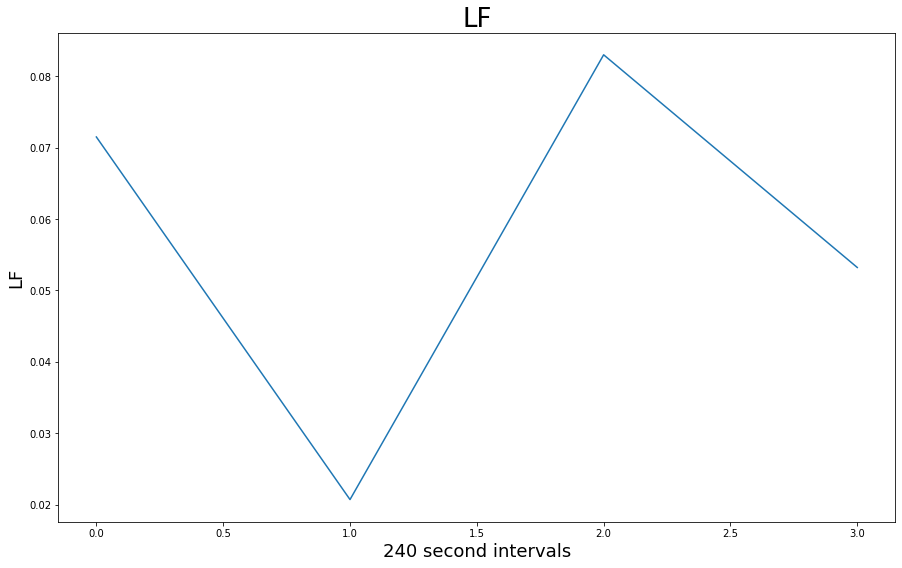

In [101]:
plt.ylabel("LF", fontsize=18)
plt.xlabel(str(sec)+" second intervals", fontsize=18)
plt.plot(LF, color="#1f77b4")
plt.title("LF",fontsize=26)